<a href="https://colab.research.google.com/github/Groot81/Financial-Analytics/blob/main/Financial_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #visualizing data
%matplotlib inline
import seaborn as sns

In [35]:
df = pd.read_csv('/content/Financial Analytics data.csv') #upload csv file
df.shape

(488, 5)

In [36]:
df.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB


In [39]:
df.columns

Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Unnamed: 4'], dtype='object')

In [40]:
#drop the unnamed col
column_to_drop = 'Unnamed: 4'
df = df.drop(column_to_drop, axis=1)

In [43]:
df.columns

Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore'], dtype='object')

In [44]:
df.isnull().sum()

S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
dtype: int64

In [47]:
# Drop rows with null values in the "Mar Cap - Crore" "Sales Qtr - Crore" column

df.dropna(subset=['Sales Qtr - Crore'], inplace=True)


In [48]:
df.isnull().sum()

S.No.                0
Name                 0
Mar Cap - Crore      0
Sales Qtr - Crore    0
dtype: int64

In [49]:
# Calculate summary statistics for market capitalization and quarterly sales
summary_stats = df[['Mar Cap - Crore', 'Sales Qtr - Crore']].describe()

# Display the summary statistics
print(summary_stats)

       Mar Cap - Crore  Sales Qtr - Crore
count       365.000000         365.000000
mean      31300.970301        4395.976849
std       67224.641338       11092.206185
min        3017.070000          47.240000
25%        5089.870000         593.740000
50%        9097.330000        1278.300000
75%       21372.180000        2840.750000
max      583436.720000      110666.930000


# **EDA**

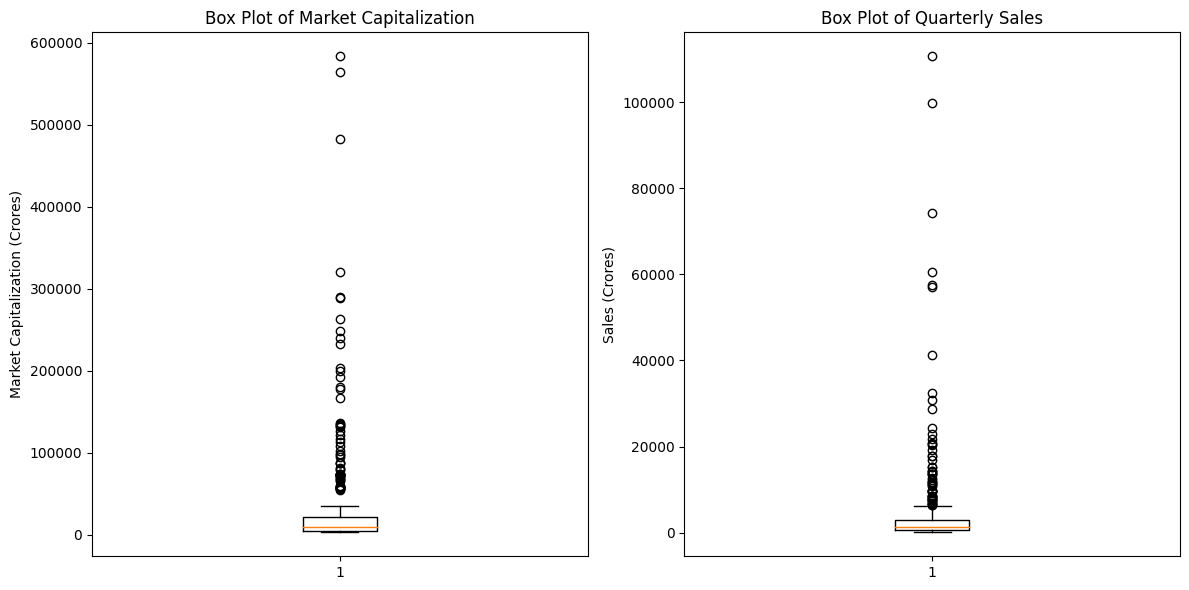

In [52]:
#To visualize the distribution of market capitalization and quarterly sales using box plots
# Create subplots for box plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(df['Mar Cap - Crore'])
plt.title('Box Plot of Market Capitalization')
plt.ylabel('Market Capitalization (Crores)')

plt.subplot(1, 2, 2)
plt.boxplot(df['Sales Qtr - Crore'])
plt.title('Box Plot of Quarterly Sales')
plt.ylabel('Sales (Crores)')

plt.tight_layout()
plt.show()

In [55]:
# Add columns for market capitalization rank and quarterly sales rank
df = df.assign(Market_Cap_Rank=df['Mar Cap - Crore'].rank(ascending=False), Sales_Rank=df['Sales Qtr - Crore'].rank(ascending=False))
df.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Market_Cap_Rank,Sales_Rank
0,1,Reliance Inds.,583436.72,99810.00,1.0,2.0
1,2,TCS,563709.84,30904.00,2.0,9.0
2,3,HDFC Bank,482953.59,20581.27,3.0,15.0
3,4,ITC,320985.27,9772.02,4.0,38.0
4,5,H D F C,289497.37,16840.51,5.0,20.0


In [59]:
# Get the top 6 performers based on market capitalization
top_market_cap = df.nsmallest(6, 'Market_Cap_Rank')

# Get the top 6 performers based on quarterly sales
top_sales = df.nsmallest(6, 'Sales_Rank')

# Display the top performers
print("Top performers based on market capitalization:")
print(top_market_cap)

print("\nTop performers based on quarterly sales:")
print(top_sales)

Top performers based on market capitalization:
   S.No.            Name  Mar Cap - Crore  Sales Qtr - Crore  Market_Cap_Rank  \
0      1  Reliance Inds.        583436.72           99810.00              1.0   
1      2             TCS        563709.84           30904.00              2.0   
2      3       HDFC Bank        482953.59           20581.27              3.0   
3      4             ITC        320985.27            9772.02              4.0   
4      5         H D F C        289497.37           16840.51              5.0   
5      6  Hind. Unilever        288265.26            8590.00              6.0   

   Sales_Rank  
0         2.0  
1         9.0  
2        15.0  
3        38.0  
4        20.0  
5        42.0  

Top performers based on quarterly sales:
    S.No.            Name  Mar Cap - Crore  Sales Qtr - Crore  \
14     15         I O C L        178017.48          110666.93   
0       1  Reliance Inds.        583436.72           99810.00   
23     24     Tata Motors        117

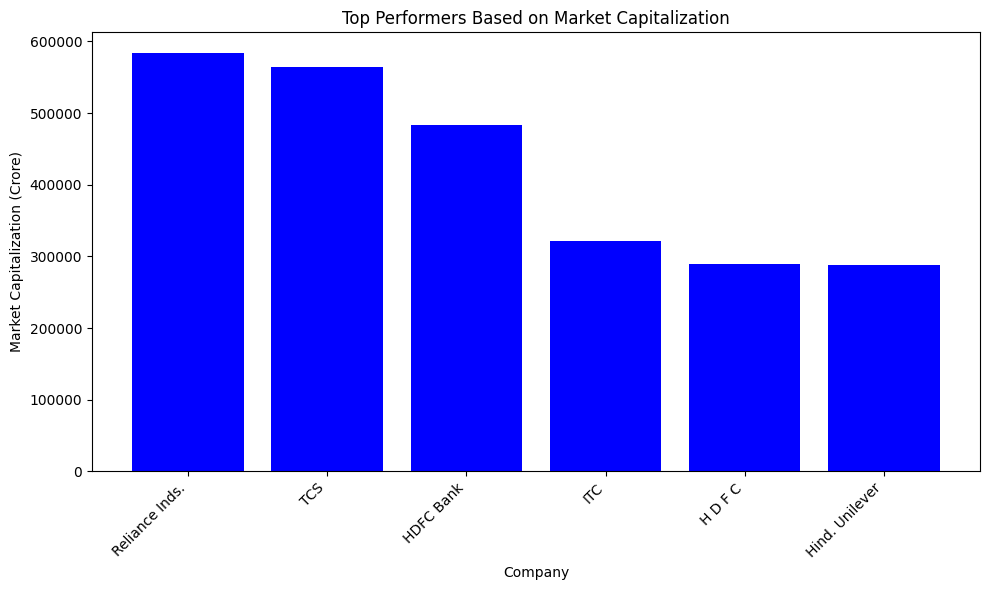

In [62]:
# Plot bar chart for top performers based on market capitalization
plt.figure(figsize=(10, 6))
plt.bar(top_market_cap['Name'], top_market_cap['Mar Cap - Crore'], color='blue')
plt.xlabel('Company')
plt.ylabel('Market Capitalization (Crore)')
plt.title('Top Performers Based on Market Capitalization')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

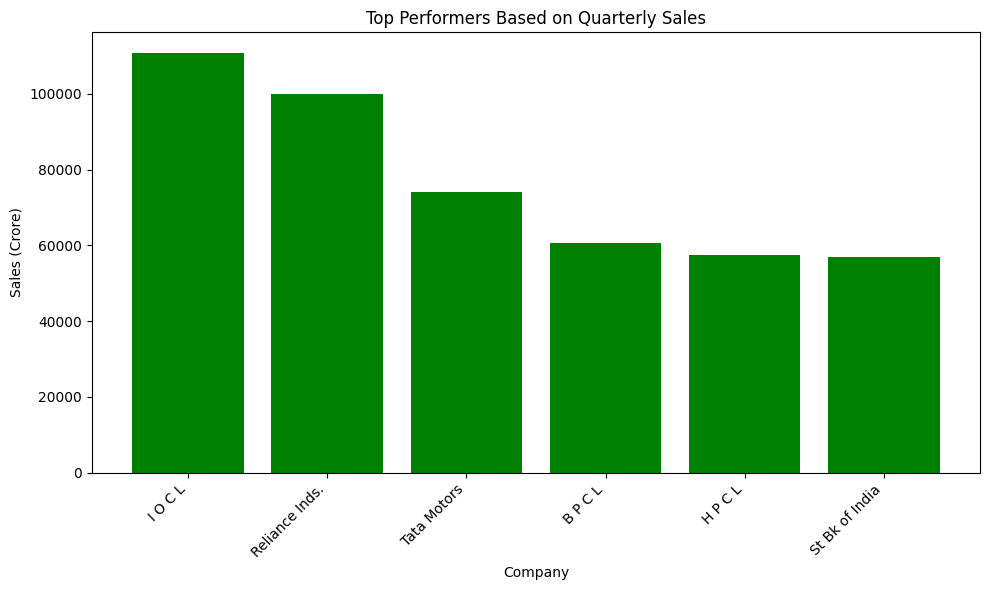

In [63]:
# Plot bar chart for top performers based on quarterly sales
plt.figure(figsize=(10, 6))
plt.bar(top_sales['Name'], top_sales['Sales Qtr - Crore'], color='green')
plt.xlabel('Company')
plt.ylabel('Sales (Crore)')
plt.title('Top Performers Based on Quarterly Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

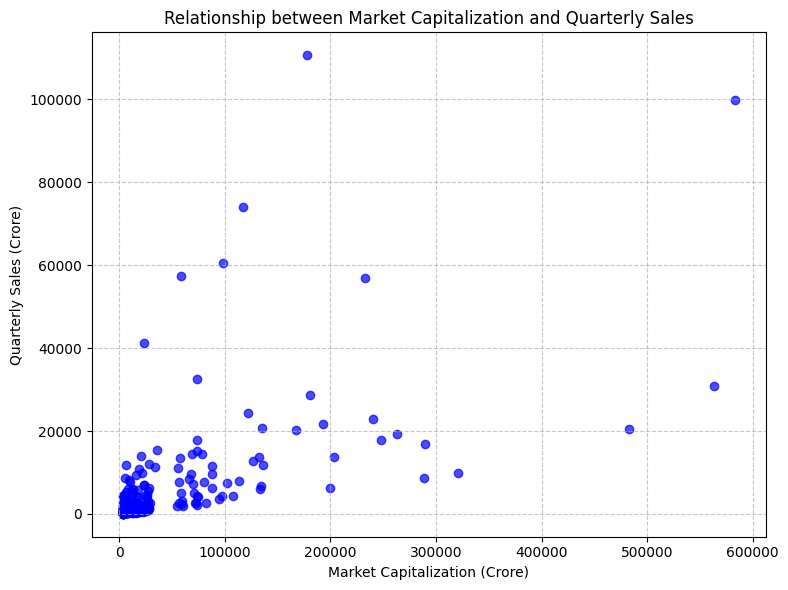

In [64]:
#To visualize the relationship between market capitalization and quarterly sales
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Mar Cap - Crore'], df['Sales Qtr - Crore'], color='blue', alpha=0.7)
plt.title('Relationship between Market Capitalization and Quarterly Sales')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Quarterly Sales (Crore)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **IQR**

In [68]:
# Calculate Q1 and Q3 for market capitalization and sales data
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate IQR for market capitalization and sales data
IQR = Q3 - Q1

# Define lower and upper fences for outliers
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Identify outliers
outliers_mar_cap = df[(df['Mar Cap - Crore'] < lower_fence['Mar Cap - Crore']) |
                       (df['Mar Cap - Crore'] > upper_fence['Mar Cap - Crore'])]

outliers_sales = df[(df['Sales Qtr - Crore'] < lower_fence['Sales Qtr - Crore']) |
                    (df['Sales Qtr - Crore'] > upper_fence['Sales Qtr - Crore'])]

print("Outliers in Market Capitalization:")
print(outliers_mar_cap)

print("\nOutliers in Quarterly Sales:")
print(outliers_sales)

Outliers in Market Capitalization:
    S.No.              Name  Mar Cap - Crore  Sales Qtr - Crore  \
0       1    Reliance Inds.        583436.72           99810.00   
1       2               TCS        563709.84           30904.00   
2       3         HDFC Bank        482953.59           20581.27   
3       4               ITC        320985.27            9772.02   
4       5           H D F C        289497.37           16840.51   
5       6    Hind. Unilever        288265.26            8590.00   
6       7     Maruti Suzuki        263493.81           19283.20   
7       8           Infosys        248320.35           17794.00   
8       9           O N G C        239981.50           22995.88   
9      10    St Bk of India        232763.33           57014.08   
10     11        ICICI Bank        203802.35           13665.35   
11     12   Kotak Mah. Bank        199253.77            6390.71   
12     13        Coal India        192677.98           21643.28   
13     14   Larsen & Toubro

<ipython-input-68-8b903d44b583>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-68-8b903d44b583>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


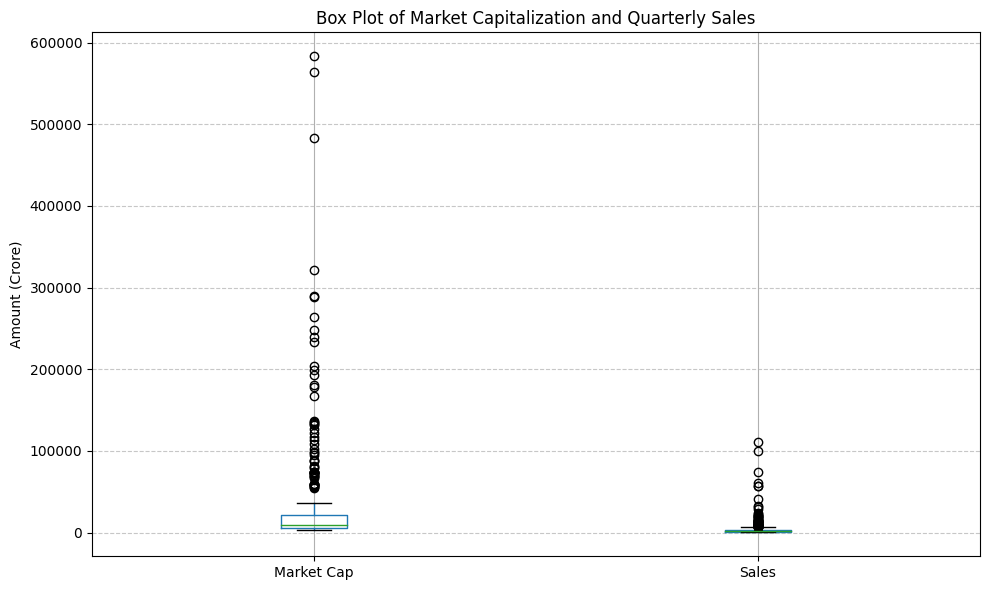

In [69]:
# Plot box plots for market capitalization and quarterly sales data
plt.figure(figsize=(10, 6))
df.boxplot(column=['Mar Cap - Crore', 'Sales Qtr - Crore'])
plt.title('Box Plot of Market Capitalization and Quarterly Sales')
plt.ylabel('Amount (Crore)')
plt.xticks([1, 2], ['Market Cap', 'Sales'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **conclusion**
Based on the provided data of the top 13 companies in India, we can perform various analyses to gain insights

Descriptive Statistics:

Calculated summary statistics for market capitalization (Mar Cap - Crore) and quarterly sales (Sales Qtr - Crore).
This includes mean, median, standard deviation, minimum, and maximum values to understand the central tendency and variability of the data.
Visualization:

Visualize the distribution of market capitalization and quarterly sales using  box plots.
This allows us to identify outliers, trends, and patterns in the data. IQR
Ranking:

Ranked the companies based on market capitalization and quarterly sales to identify the top performers in each category.

Correlation Analysis:

Calculated the correlation coefficient between market capitalization and quarterly sales.


